In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

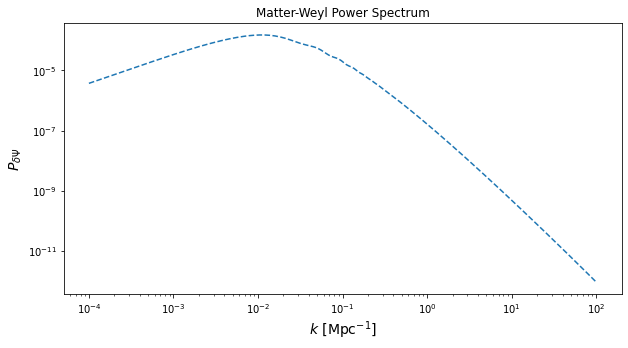

In [3]:
# Matter-Weyl Potential
power = Powerspectra()
ks = np.logspace(-4, 2, 200)
z = 20
ps = power.get_matter_weyl_ps(z, ks)

plt.figure()
plt.loglog(ks, np.abs(ps), linestyle="--")
plt.ylabel("$P_{\delta\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Matter-Weyl Power Spectrum")
plt.show()

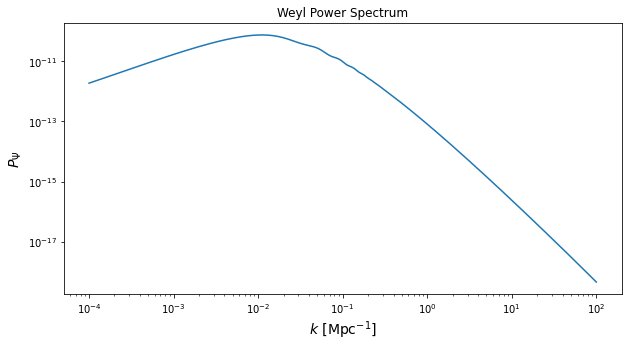

In [4]:
# Weyl Potential
power = Powerspectra()
ks = np.logspace(-4, 2, 200)
z = 20
ps = power.get_weyl_ps(z, ks)

plt.figure()
plt.loglog(ks, ps)
plt.ylabel("$P_{\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Weyl Power Spectrum")
plt.show()

In [5]:
cosmo = Cosmology()
print(cosmo.z_to_Chi(0.311))

1271.4860479186814


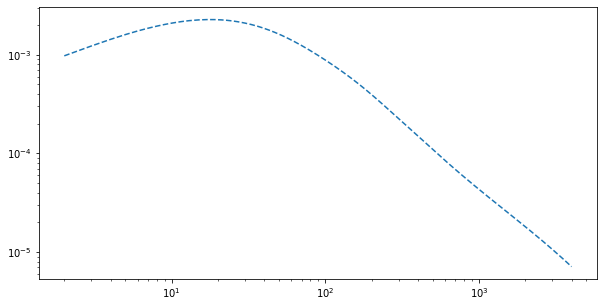

In [6]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gk = power.get_gal_kappa_ps(ells, Chi_str)
plt.figure()
#plt.loglog(ells, np.abs(Cl_gk)*(ells*(ells + 1))**2/(2*np.pi))
plt.loglog(ells, np.abs(Cl_gk), linestyle="--")
plt.show()

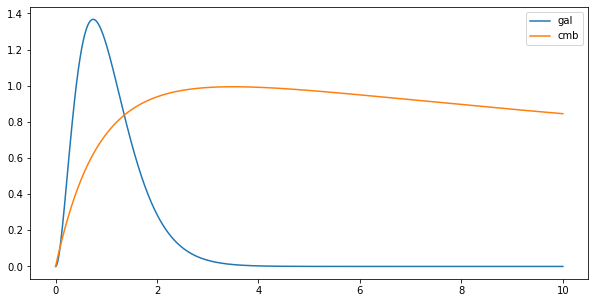

In [7]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
gal_window = cosmo.gal_cluster_window(Chis)
cmb_window = cosmo.cmb_lens_window(Chis, Chi_str)
zs = cosmo.Chi_to_z(Chis)
plt.figure()
plt.plot(zs, gal_window, label="gal")
plt.plot(zs, Chis**2*cmb_window/3500, label="cmb")
plt.legend()
plt.show()

(0.0, 3.0)

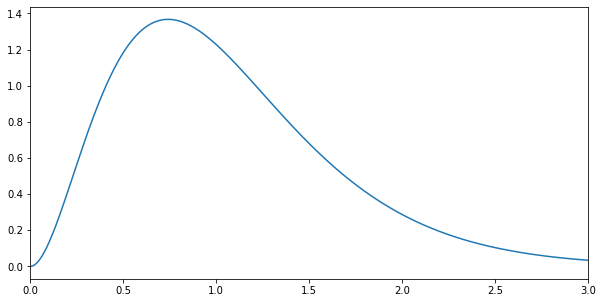

In [8]:
zs = cosmo.Chi_to_z(Chis)
plt.figure()
plt.plot(zs, gal_window)
plt.xlim(0, 3)

In [9]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kk = mode.components(ells1, ells2, Nchi=100)

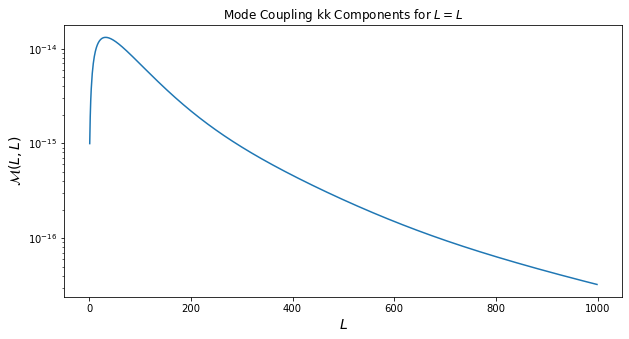

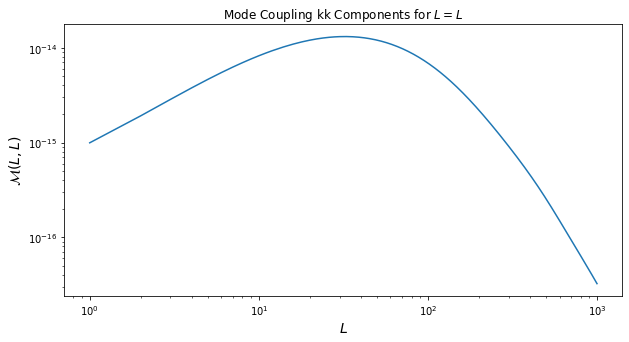

In [10]:
plt.figure()
plt.semilogy(ells1, M_kk)
plt.title("Mode Coupling kk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_kk)
plt.title("Mode Coupling kk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [11]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gg = mode.components(ells1, ells2, typ="gal-gal", Nchi=100)

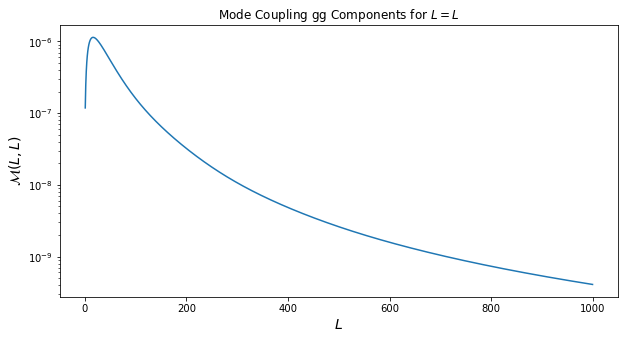

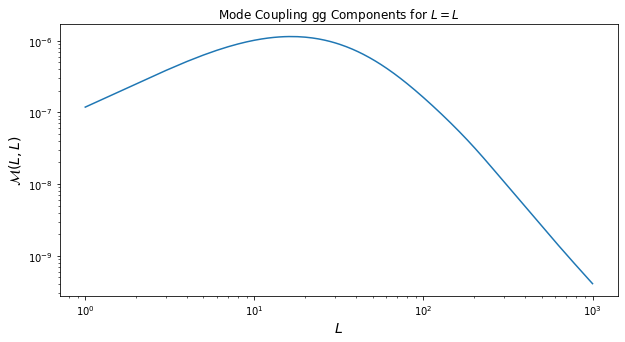

In [12]:
plt.figure()
plt.semilogy(ells1, M_gg)
plt.title("Mode Coupling gg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_gg)
plt.title("Mode Coupling gg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [13]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_gk = mode.components(ells1, ells2, typ="gal-kappa", Nchi=100)

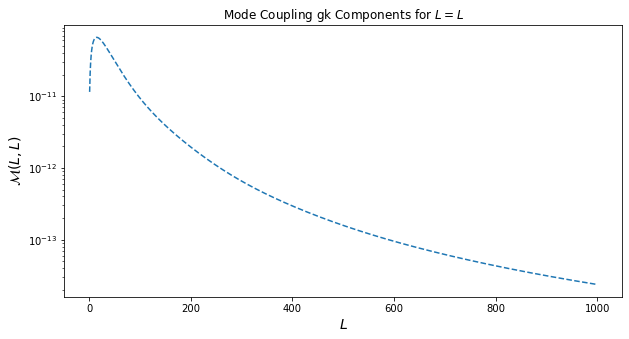

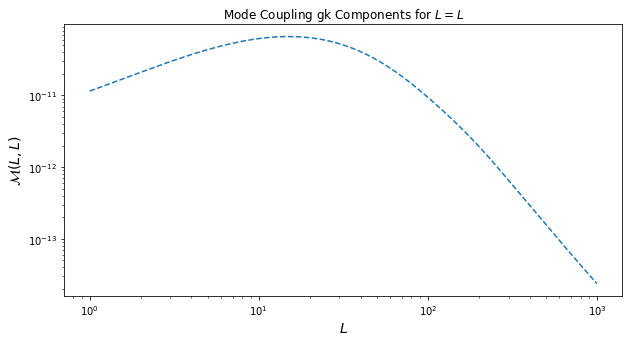

In [14]:
plt.figure()
plt.semilogy(ells1, np.abs(M_gk), linestyle="--")
plt.title("Mode Coupling gk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_gk), linestyle="--")
plt.title("Mode Coupling gk Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [15]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kg = mode.components(ells1, ells2, typ="kappa-gal", Nchi=100)

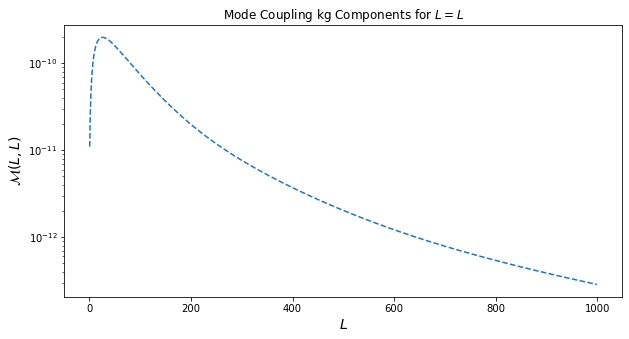

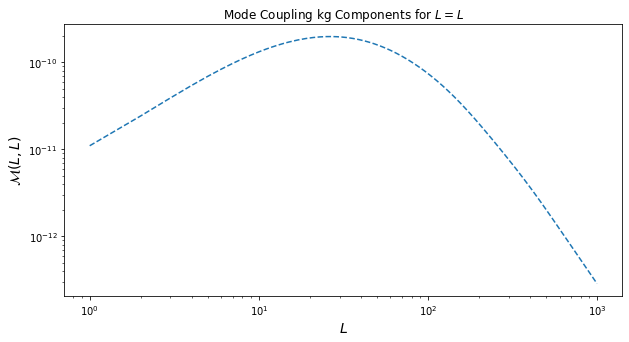

In [16]:
plt.figure()
plt.semilogy(ells1, np.abs(M_kg), linestyle="--")
plt.title("Mode Coupling kg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, np.abs(M_kg), linestyle="--")
plt.title("Mode Coupling kg Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

In [17]:
from bispectra import Bispectra
bi = Bispectra()

In [18]:
ells1 = np.arange(2, 10001)
ells2 = ells1/2
ells3 = 1000
bi_ggw = bi.get_gal_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:37: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


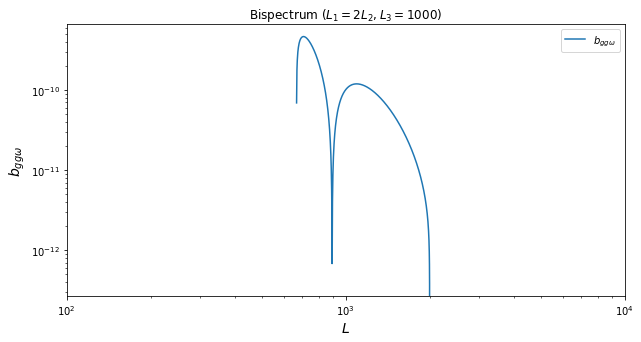

In [19]:
plt.figure()
plt.loglog(ells1, np.abs(bi_ggw), label="$b_{gg\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{gg\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [20]:
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:37: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


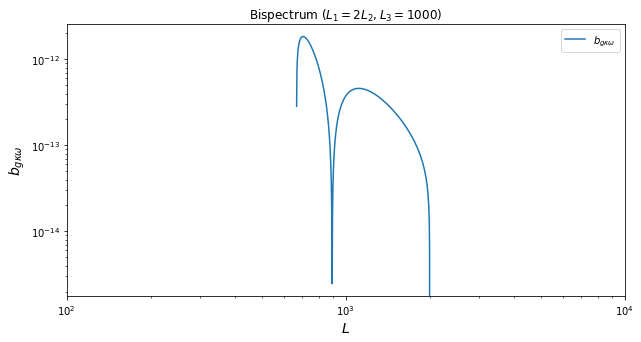

In [21]:
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [22]:
ells2 = ells1
ells3 = ells1
bi_gkw = bi.get_gal_convergence_rotation_bispectrum(ells1, ells2, ells3, M_spline=True)

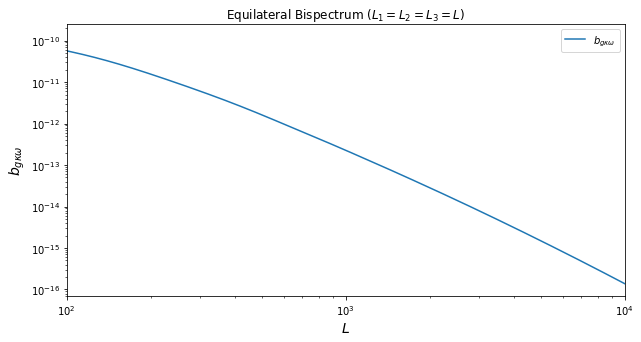

In [23]:
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [24]:
def get_L3s(L1, L2, steps):
    Lmin = np.floor(np.abs(L1 - L2)) + 1
    Lmax = np.ceil(L1 + L2)
    L3s = np.arange(Lmin, Lmax, steps, dtype=int)
    Lmid = L1//2
    Lrange = Lmid - L3s[0]
    return L3s[np.where(L3s <= Lmid + Lrange)]

def get_bi_slice(L1, steps, typ):
    bi_slice = np.empty((L1 + 1, L1 + 1))
    bi_slice[:] = np.nan
    L2s = np.arange(L1//2, L1 + 1, steps, dtype=int)
    for L2 in L2s:
        L3s = get_L3s(L1, L2, steps)
        if typ == "rot":
            bi_slice[L2, L3s] = bi.get_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "conv":
            bi_slice[L2, L3s] = bi.get_convergence_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "ggw":
            bi_slice[L2, L3s] = bi.get_gal_rotation_bispectrum(L1, L2, L3s, M_spline=True)
        elif typ == "gkw":
            bi_slice[L2, L3s] = bi.get_gal_convergence_rotation_bispectrum(L1, L2, L3s, M_spline=True)
    return bi_slice

In [25]:
plt.rcParams['figure.figsize'] = [10,4]
def slice_plot(L1, steps, bispectrum = "rot", interpolation="nearest"):
    bi_slice = get_bi_slice(L1, steps, typ=bispectrum)
    masked_slice = np.ma.array(bi_slice, mask=np.isnan(bi_slice))
    plt.figure()
    cmap = matplotlib.cm.jet
    cmap = matplotlib.cm.get_cmap("jet").copy()
    cmap.set_bad('white',1.)
    plt.imshow(masked_slice[L1//2:, :], interpolation=interpolation, cmap=cmap, origin='lower', extent=[0, L1, L1//2, L1])
    plt.colorbar()

    x = np.arange(0,L1 + 1, steps)
    y = np.concatenate((np.arange(L1, L1//2, -steps), np.arange(L1//2, L1 + 1, steps)))
    plt.plot(x,y, linewidth=5, color='k')
    plt.xlabel("$L_3$")
    plt.ylabel("$L_2$")
    if bispectrum == "rot":
        plt.title(f"$b^{{\kappa\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "conv":
        plt.title(f"$b^{{\kappa\kappa\kappa}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "ggw":
        plt.title(f"$b^{{gg\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "gkw":
        plt.title(f"$b^{{g\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")

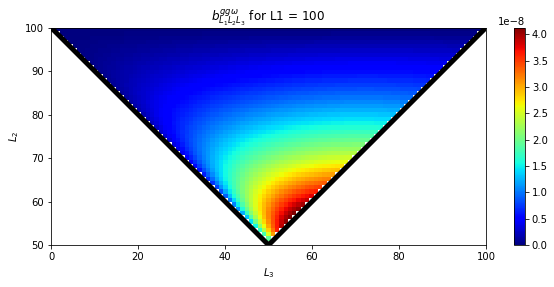

In [26]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

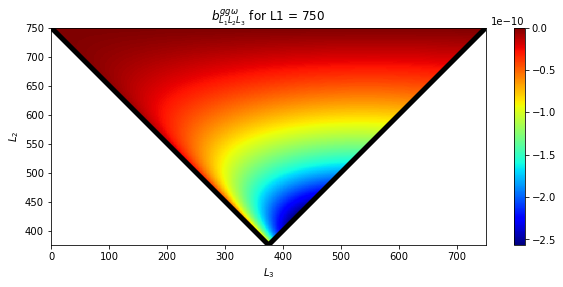

In [27]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

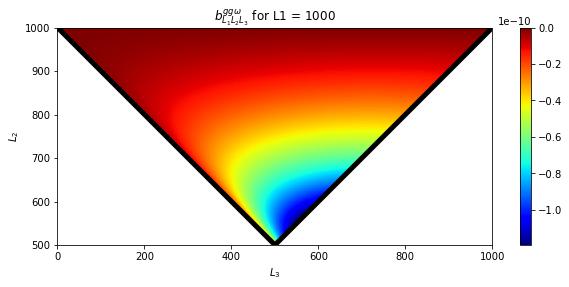

In [28]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

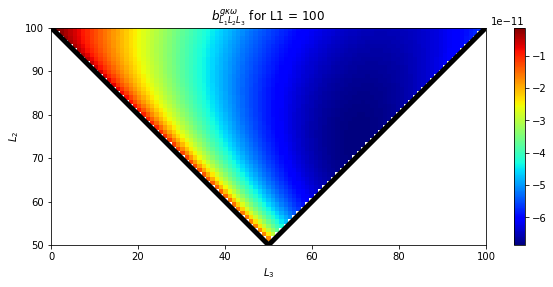

In [29]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

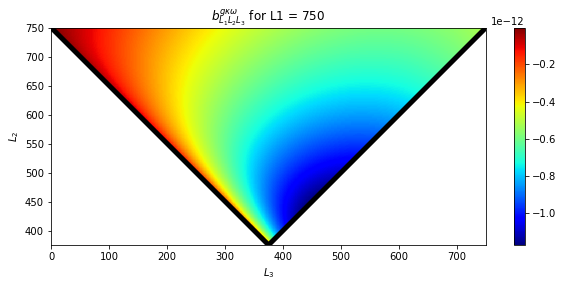

In [30]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

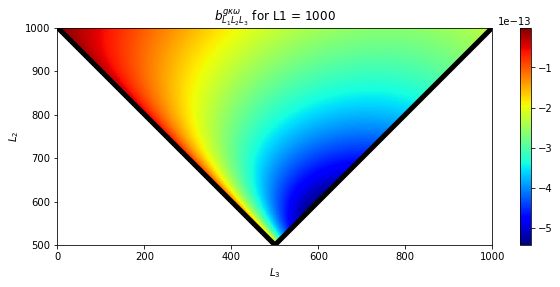

In [31]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()